In [57]:
from model import *
from data import *
import skimage.io as io
import skimage.transform as trans
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [93]:
def get_test_images(image_path, num_imagees=10, image_size=(256,256)):
    while True:
        assert os.path.isdir(image_path), 'Could not find {}'.format(image_path)
        filenames = [os.path.join(image_path, f) for f in os.listdir(image_path)if f.endswith('.jpg')]
        print(len(filenames))
        for i, f in enumerate(filenames):
            if i < num_imagees:
                img = io.imread(f)
                img = img/255
                img = trans.resize(img,image_size)
                img = np.reshape(img, (1,) + img.shape)
                yield img

In [94]:
test_dir = '../data/Training/ISIC2018_256_256_input/test'
images = get_test_images(test_dir, 10)

In [95]:

model = unet()
model.load_weights('unet_ori.hdf5')

/home/jwang/jwang/Unet_keras/model.py:69: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [96]:
results = model.predict_generator(images, 10, verbose=1)

260
260


/home/jwang/jwang/deep-learning-server/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/jwang/jwang/deep-learning-server/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


10/10 [==============================] - 0s 47ms/step


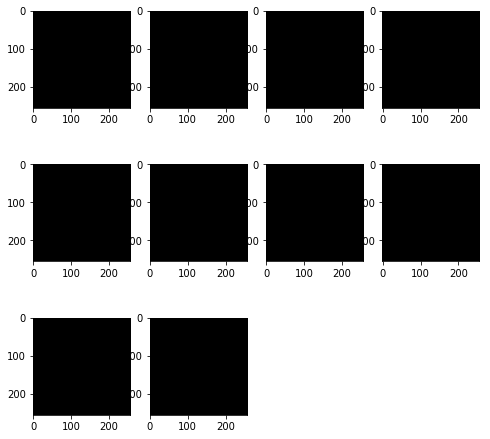

In [110]:
fig = plt.figure(figsize=(8,8))
for i, img in enumerate(results):
    img = np.reshape(img,(256,256))
    img = (img > 0.1) * 255
    fig.add_subplot(3,4,i+1)
    plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [113]:
pick = results[3]
print(pick.max())

0.25742856


In [122]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'membrane/train','image','label',data_gen_args,save_to_dir = None)

In [123]:
for img,mask in myGene:
    print(img.shape)

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)
(2, 256, 256, 3)


KeyboardInterrupt: 